# Linear Regression

In [14]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
#information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [20]:
#stastical information
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<function matplotlib.pyplot.show(*args, **kw)>

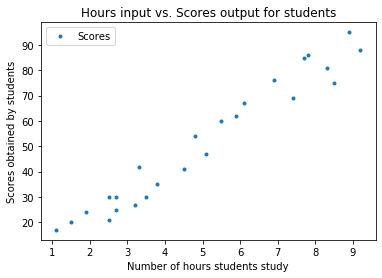

<Figure size 1008x432 with 0 Axes>

In [24]:
#plotting and finding relation between variables


data.plot(x='Hours', y='Scores', style='.')
plt.xlabel('Number of hours students study')
plt.ylabel('Scores obtained by students')
plt.title('Hours input vs. Scores output for students')
plt.figure(figsize=[14,6])
plt.show


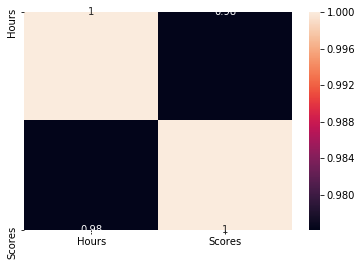

In [26]:
#checking correlation

correlation = data.corr()

#heatmap

sns.heatmap(correlation, annot=True)

In [ ]:
# As observed a strong positive correlation is observed

#  Model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse


In [33]:
#splitting the data

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [34]:
#splitting the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [36]:
# Model

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(f'Coefficient : {linreg.coef_}')
print(f'Intercept: {linreg.intercept_}')

Coefficient : [9.91065648]
Intercept: 2.018160041434683


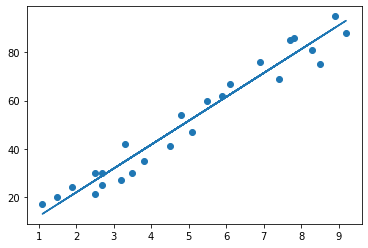

In [38]:
#plotting the results

regression_line = linreg.coef_*X + linreg.intercept_
plt.scatter(X,y)
plt.plot(X, regression_line)

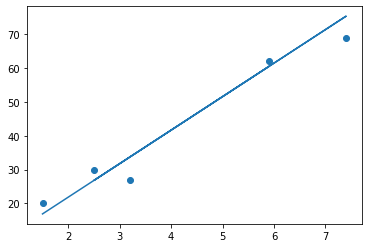

In [41]:
#predicting

y_pred = linreg.predict(X_test)

#plotting the results

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)

In [46]:
#evaluating the metrics
import math

linreg_mse = mse(y_test, y_pred)

rmse = math.sqrt(linreg_mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 4.6474476121003665


In [47]:
#Comparing

results_df = pd.DataFrame({'Actual': y_test, 'Result':y_pred })
results_df

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [55]:
#Making custom prediction

hour_1 = np.array(9.25)
custom_predict = linreg.predict(hour_1.reshape(-1,1))

print(f'Hour for prediction: {hour_1}')
print(f'Predicted score: {custom_predict[0]}')

Hour for prediction: 9.25
Predicted score: 93.69173248737538


# Predicted score is 93.69 when student studies for 9.25 hours